In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

In [2]:
def i2kl_x(i, N):
    i = np.asarray(i)
    assert i.dtype.kind is 'i', 'i must be integer'
    assert isinstance(N, int), 'N must be integer'
    l = np.ceil(i/N).astype(int)
    k = i - (l - 1)*N
    return k, l

def kl2i_x(k, l, N):
    k = np.asarray(k)
    l = np.asarray(l)
    assert k.dtype.kind is 'i', 'k must be integer'
    assert l.dtype.kind is 'i', 'l must be integer'
    assert isinstance(N, int), 'N must be integer'
    i = (l - 1)*N + k
    return i

In [3]:
def i2kl_y(i, N):
    i = np.asarray(i)
    assert i.dtype.kind is 'i', 'i must be integer'
    assert isinstance(N, int), 'N must be integer'
    k = np.ceil(i/N).astype(int)
    l = i - (k - 1)*N
    return k, l

def kl2i_y(k, l, N):
    k = np.asarray(k)
    l = np.asarray(l)
    assert k.dtype.kind is 'i', 'k must be integer'
    assert l.dtype.kind is 'i', 'l must be integer'
    assert isinstance(N, int), 'N must be integer'
    i = (k - 1)*N + l
    return i

In [4]:
def Delta_ij(Nx, Ny, order='x'):
    assert isinstance(Nx, int), 'Nx must be integer'
    assert isinstance(Ny, int), 'Ny must be integer'
    assert (Nx > 0) and (Ny > 0), 'Nx and Ny must be positive'
    assert order in ['x', 'y'], 'order must be "x" or "y"'

    j, i = np.meshgrid(np.arange(1, Nx*Ny+1), 
                       np.arange(1, Nx*Ny+1))
    
    if order == 'x':
        Dij = np.ceil(i/Nx) - np.ceil(j/Nx)
    else:
        Dij = np.ceil(i/Ny) - np.ceil(j/Ny)

    return i, j, Dij.astype(int)

In [5]:
def diff_i_j(Nx, Ny):
    assert isinstance(Nx, int), 'Nx must be integer'
    assert isinstance(Ny, int), 'Ny must be integer'
    assert (Nx > 0) and (Ny > 0), 'Nx and Ny must be positive'

    j, i = np.meshgrid(np.arange(1, Nx*Ny+1), 
                       np.arange(1, Nx*Ny+1))
    diff = i - j

    return diff

In [6]:
def Delta_kij(Nx, Ny, order='x'):
    assert isinstance(Nx, int), 'Nx must be integer'
    assert isinstance(Ny, int), 'Ny must be integer'
    assert (Nx > 0) and (Ny > 0), 'Nx and Ny must be positive'
    assert order in ['x', 'y'], 'order must be "col" or "row"'

    i, j, Dij = Delta_ij(Nx=Nx, Ny=Ny, order=order)

    if order == 'x':
        result = i - j - Dij*Nx
    else:
        result = Dij

    return result

In [7]:
def Delta_lij(Nx, Ny, order='x'):
    assert isinstance(Nx, int), 'Nx must be integer'
    assert isinstance(Ny, int), 'Ny must be integer'
    assert (Nx > 0) and (Ny > 0), 'Nx and Ny must be positive'
    assert order in ['x', 'y'], 'order must be "col" or "row"'

    i, j, Dij = Delta_ij(Nx=Nx, Ny=Ny, order=order)

    if order == 'x':
        result = Dij
    else:
        result = i - j - Dij*Ny

    return result

In [8]:
def indexed_grid(Nx, Ny, cmap='viridis'):
    
    assert isinstance(Nx, int), 'Nx must be integer'
    assert isinstance(Ny, int), 'Ny must be integer'
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
    fig.subplots_adjust(left=0.03, right=0.97, hspace=0.5, wspace=0.5)

    data = np.arange(1, Nx*Ny + 1)
    
    data_x = data.reshape((Ny, Nx)).T[::-1]
    data_y = data.reshape((Nx, Ny))[::-1]

    k = np.arange(1, Nx+1)[::-1]
    l = np.arange(1, Ny+1)

    for d, ax in zip([data_x, data_y], axs.flat):

        # Plot the grid as a colormap
        im = ax.imshow(d, cmap=cmap)

        # Set the formatter
        valfmt = tck.StrMethodFormatter("{x:3d}")

        # Loop over the data and create a `Text` for each "pixel".
        for i in range(d.shape[0]):
            for j in range(d.shape[1]):
                im.axes.text(j, i, valfmt(d[i, j], None), color='k', fontsize=14, 
                             horizontalalignment="center", verticalalignment="center")

        # set the ticks
        ax.set_xticks(np.arange(d.shape[1]))
        ax.set_yticks(np.arange(d.shape[0]))

        # Set the labels
        ax.set_xticklabels(l, fontsize=12)
        ax.set_yticklabels(k, fontsize=12)
        ax.set_xlabel('index l', fontsize=16)
        ax.set_ylabel('index k', fontsize=16)

        ax.set_xticks(np.arange(d.shape[1]+1)-.5, minor=True)
        ax.set_yticks(np.arange(d.shape[0]+1)-.5, minor=True)
        ax.tick_params(which="minor", bottom=False, left=False)
        ax.grid(which="minor", color="k", linestyle='-', linewidth=3)

    fig.tight_layout()
    plt.show()

In [9]:
def plot_grid(data, cmap='seismic'):
    bounds = np.array([i for i in np.arange(np.min(data)-0.5, np.max(data)+1.5, 1)])
    ticks_place = bounds+0.5
    fig, ax = plt.subplots()
    cax = ax.matshow(data, cmap=plt.get_cmap(cmap))
    cbar = fig.colorbar(cax, boundaries=bounds, ticks=ticks_place)
    plt.show()

## Examples of indexed grid

Consider a regular grid of $N_{x} \times N_{y}$ observation points $(x_{i}, y_{i}, z_{i})$, $i = 1, \dots, N = N_{x} \, N_{y}$. The indices $i$ may be defined along the $x$- or $y$-axis, according to the Figure A1.

In [10]:
Nx = 4
Ny = 3

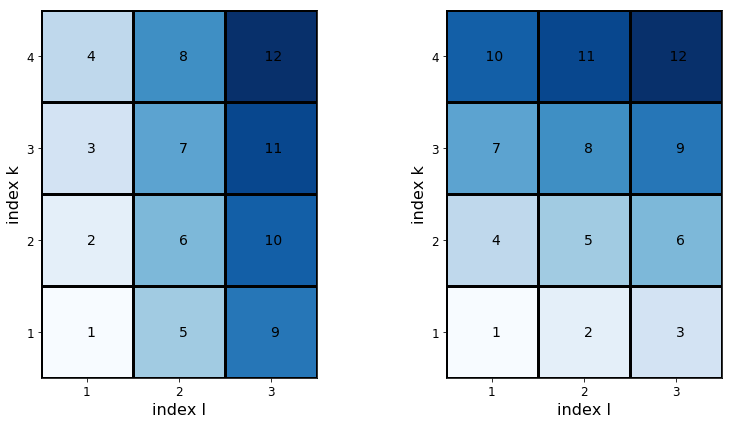

In [11]:
indexed_grid(Nx, Ny, cmap='Blues')

<a id='fig1'></a>

**Figure A1:** Schematic representation of two regular grids of $N_{x} \times N_{y}$ observation points $(x_{i}, y_{i})$, $i = 1, \dots, N = N_{x} \, N_{y}$, with $N_{x} = 4$ and $N_{y} = 3$. These coordinates are conveniently called observation coordinates. The grid indices $k$ and $l$ define the grid coordinates $x_{k}$ and $y_{l}$, respectively. The numbers inside the colored squares represent the observation index $i$. The left panel shows an $x$-oriented grid. The right panel shows an $y$-oriented grid. For both grids, the point $(x_{1}, y_{1})$ is located at the lower-left corner.

## Generate synthetic data

In [12]:
Nx = 4
Ny = 3

In [13]:
Dx = 1
Dy = 2.5

In [14]:
Dz = 3

#### Plot the simulated $x$-oriented grids

In [15]:
i, j, Dij = Delta_ij(Nx, Ny, order='x')

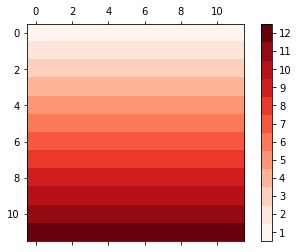

In [16]:
plot_grid(i, cmap='Reds')

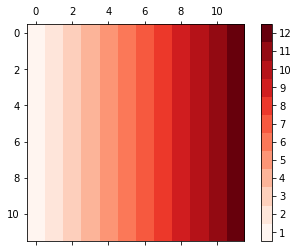

In [17]:
plot_grid(j, cmap='Reds')

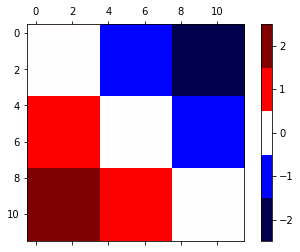

In [18]:
plot_grid(Dij)

In [19]:
Dij

array([[ 0,  0,  0,  0, -1, -1, -1, -1, -2, -2, -2, -2],
       [ 0,  0,  0,  0, -1, -1, -1, -1, -2, -2, -2, -2],
       [ 0,  0,  0,  0, -1, -1, -1, -1, -2, -2, -2, -2],
       [ 0,  0,  0,  0, -1, -1, -1, -1, -2, -2, -2, -2],
       [ 1,  1,  1,  1,  0,  0,  0,  0, -1, -1, -1, -1],
       [ 1,  1,  1,  1,  0,  0,  0,  0, -1, -1, -1, -1],
       [ 1,  1,  1,  1,  0,  0,  0,  0, -1, -1, -1, -1],
       [ 1,  1,  1,  1,  0,  0,  0,  0, -1, -1, -1, -1],
       [ 2,  2,  2,  2,  1,  1,  1,  1,  0,  0,  0,  0],
       [ 2,  2,  2,  2,  1,  1,  1,  1,  0,  0,  0,  0],
       [ 2,  2,  2,  2,  1,  1,  1,  1,  0,  0,  0,  0],
       [ 2,  2,  2,  2,  1,  1,  1,  1,  0,  0,  0,  0]])

In [20]:
diff_ij_grid = diff_i_j(Nx, Ny)

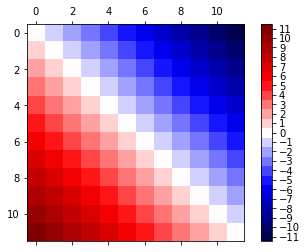

In [21]:
plot_grid(diff_ij_grid)

In [22]:
Dkij_grid = Delta_kij(Nx, Ny, order='x')

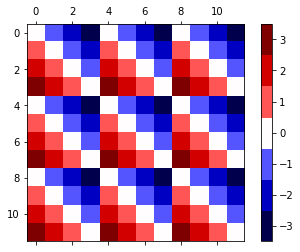

In [23]:
plot_grid(Dkij_grid)

In [24]:
Dkij_grid

array([[ 0, -1, -2, -3,  0, -1, -2, -3,  0, -1, -2, -3],
       [ 1,  0, -1, -2,  1,  0, -1, -2,  1,  0, -1, -2],
       [ 2,  1,  0, -1,  2,  1,  0, -1,  2,  1,  0, -1],
       [ 3,  2,  1,  0,  3,  2,  1,  0,  3,  2,  1,  0],
       [ 0, -1, -2, -3,  0, -1, -2, -3,  0, -1, -2, -3],
       [ 1,  0, -1, -2,  1,  0, -1, -2,  1,  0, -1, -2],
       [ 2,  1,  0, -1,  2,  1,  0, -1,  2,  1,  0, -1],
       [ 3,  2,  1,  0,  3,  2,  1,  0,  3,  2,  1,  0],
       [ 0, -1, -2, -3,  0, -1, -2, -3,  0, -1, -2, -3],
       [ 1,  0, -1, -2,  1,  0, -1, -2,  1,  0, -1, -2],
       [ 2,  1,  0, -1,  2,  1,  0, -1,  2,  1,  0, -1],
       [ 3,  2,  1,  0,  3,  2,  1,  0,  3,  2,  1,  0]])

In [25]:
Dlij_grid = Delta_lij(Nx, Ny, order='x')

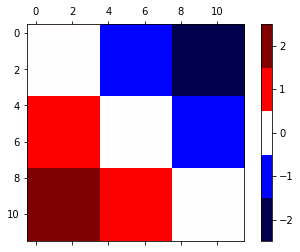

In [26]:
plot_grid(Dlij_grid)

In [27]:
Dlij_grid

array([[ 0,  0,  0,  0, -1, -1, -1, -1, -2, -2, -2, -2],
       [ 0,  0,  0,  0, -1, -1, -1, -1, -2, -2, -2, -2],
       [ 0,  0,  0,  0, -1, -1, -1, -1, -2, -2, -2, -2],
       [ 0,  0,  0,  0, -1, -1, -1, -1, -2, -2, -2, -2],
       [ 1,  1,  1,  1,  0,  0,  0,  0, -1, -1, -1, -1],
       [ 1,  1,  1,  1,  0,  0,  0,  0, -1, -1, -1, -1],
       [ 1,  1,  1,  1,  0,  0,  0,  0, -1, -1, -1, -1],
       [ 1,  1,  1,  1,  0,  0,  0,  0, -1, -1, -1, -1],
       [ 2,  2,  2,  2,  1,  1,  1,  1,  0,  0,  0,  0],
       [ 2,  2,  2,  2,  1,  1,  1,  1,  0,  0,  0,  0],
       [ 2,  2,  2,  2,  1,  1,  1,  1,  0,  0,  0,  0],
       [ 2,  2,  2,  2,  1,  1,  1,  1,  0,  0,  0,  0]])

In [28]:
R = np.sqrt((Dkij_grid*Dx)**2 + (Dlij_grid*Dy)**2 + (np.ones((Nx*Ny, Nx*Ny))*Dz)**2)

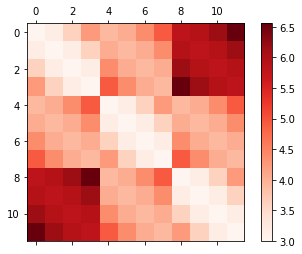

In [29]:
fig, ax = plt.subplots()
cax = ax.matshow(R, cmap=plt.get_cmap('Reds'))
cbar = fig.colorbar(cax)
plt.show()

In [30]:
A = Dz/(R**3)

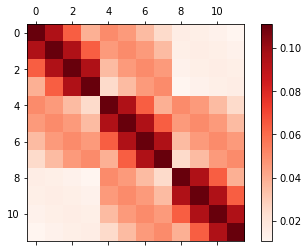

In [31]:
fig, ax = plt.subplots()
cax = ax.matshow(A, cmap=plt.get_cmap('Reds'))
cbar = fig.colorbar(cax)
plt.show()

#### Plot the simulated $y$-oriented grids

In [32]:
i, j, Dij = Delta_ij(Nx, Ny, order='y')

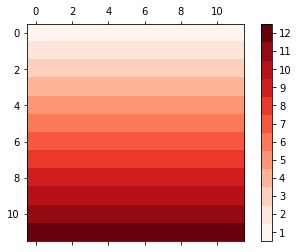

In [33]:
plot_grid(i, cmap='Reds')

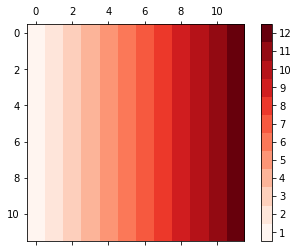

In [34]:
plot_grid(j, cmap='Reds')

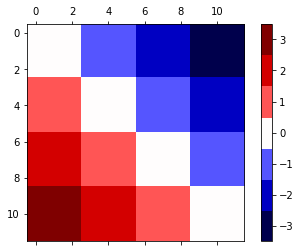

In [35]:
plot_grid(Dij)

In [36]:
Dij

array([[ 0,  0,  0, -1, -1, -1, -2, -2, -2, -3, -3, -3],
       [ 0,  0,  0, -1, -1, -1, -2, -2, -2, -3, -3, -3],
       [ 0,  0,  0, -1, -1, -1, -2, -2, -2, -3, -3, -3],
       [ 1,  1,  1,  0,  0,  0, -1, -1, -1, -2, -2, -2],
       [ 1,  1,  1,  0,  0,  0, -1, -1, -1, -2, -2, -2],
       [ 1,  1,  1,  0,  0,  0, -1, -1, -1, -2, -2, -2],
       [ 2,  2,  2,  1,  1,  1,  0,  0,  0, -1, -1, -1],
       [ 2,  2,  2,  1,  1,  1,  0,  0,  0, -1, -1, -1],
       [ 2,  2,  2,  1,  1,  1,  0,  0,  0, -1, -1, -1],
       [ 3,  3,  3,  2,  2,  2,  1,  1,  1,  0,  0,  0],
       [ 3,  3,  3,  2,  2,  2,  1,  1,  1,  0,  0,  0],
       [ 3,  3,  3,  2,  2,  2,  1,  1,  1,  0,  0,  0]])

In [37]:
diff_ij_grid = diff_i_j(Nx, Ny)

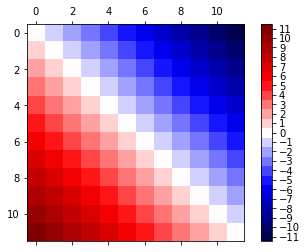

In [38]:
plot_grid(diff_ij_grid)

In [39]:
Dkij_grid = Delta_kij(Nx, Ny, order='y')

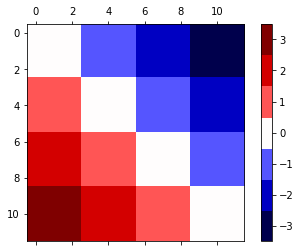

In [40]:
plot_grid(Dkij_grid)

In [41]:
Dkij_grid

array([[ 0,  0,  0, -1, -1, -1, -2, -2, -2, -3, -3, -3],
       [ 0,  0,  0, -1, -1, -1, -2, -2, -2, -3, -3, -3],
       [ 0,  0,  0, -1, -1, -1, -2, -2, -2, -3, -3, -3],
       [ 1,  1,  1,  0,  0,  0, -1, -1, -1, -2, -2, -2],
       [ 1,  1,  1,  0,  0,  0, -1, -1, -1, -2, -2, -2],
       [ 1,  1,  1,  0,  0,  0, -1, -1, -1, -2, -2, -2],
       [ 2,  2,  2,  1,  1,  1,  0,  0,  0, -1, -1, -1],
       [ 2,  2,  2,  1,  1,  1,  0,  0,  0, -1, -1, -1],
       [ 2,  2,  2,  1,  1,  1,  0,  0,  0, -1, -1, -1],
       [ 3,  3,  3,  2,  2,  2,  1,  1,  1,  0,  0,  0],
       [ 3,  3,  3,  2,  2,  2,  1,  1,  1,  0,  0,  0],
       [ 3,  3,  3,  2,  2,  2,  1,  1,  1,  0,  0,  0]])

In [42]:
Dlij_grid = Delta_lij(Nx, Ny, order='y')

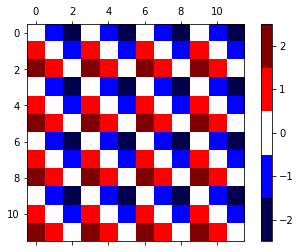

In [43]:
plot_grid(Dlij_grid)

In [44]:
Dlij_grid

array([[ 0, -1, -2,  0, -1, -2,  0, -1, -2,  0, -1, -2],
       [ 1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1],
       [ 2,  1,  0,  2,  1,  0,  2,  1,  0,  2,  1,  0],
       [ 0, -1, -2,  0, -1, -2,  0, -1, -2,  0, -1, -2],
       [ 1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1],
       [ 2,  1,  0,  2,  1,  0,  2,  1,  0,  2,  1,  0],
       [ 0, -1, -2,  0, -1, -2,  0, -1, -2,  0, -1, -2],
       [ 1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1],
       [ 2,  1,  0,  2,  1,  0,  2,  1,  0,  2,  1,  0],
       [ 0, -1, -2,  0, -1, -2,  0, -1, -2,  0, -1, -2],
       [ 1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1],
       [ 2,  1,  0,  2,  1,  0,  2,  1,  0,  2,  1,  0]])

In [45]:
R = np.sqrt((Dkij_grid*Dx)**2 + (Dlij_grid*Dy)**2 + (np.ones((Nx*Ny, Nx*Ny))*Dz)**2)

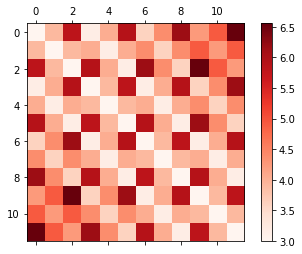

In [46]:
fig, ax = plt.subplots()
cax = ax.matshow(R, cmap=plt.get_cmap('Reds'))
cbar = fig.colorbar(cax)
plt.show()

In [47]:
A = Dz/(R**3)

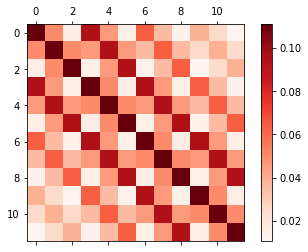

In [48]:
fig, ax = plt.subplots()
cax = ax.matshow(A, cmap=plt.get_cmap('Reds'))
cbar = fig.colorbar(cax)
plt.show()